# The aixACCT Notebook

## Table of contents
- Simple example
    1. Loading a file
    2. Choosing an interesting column of the table
- New example
    1. Loading multiple files
    2. Setting up plots (1 independent, many dependent variables)
    3. Plotting the data from one file
    4. Plotting the data from multiple files

In [1]:
%matplotlib widget
# This imports the functions I implemented
from helperFunctions import loadTable, plotData, plotMultiple
# import pandas as pd

### Simple example: 1. Select your file  
We're using the `filedialog` from `tkinter` GUI; specifically the `askopenfilename()` function.

In [2]:
from tkinter import filedialog as fd
filename = fd.askopenfilename()
filename

'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat'

In [3]:
firstTable = loadTable(filename)

# You can see the keys (column headers) and values (the rest of the columns) separately
namesOfVariables, measuredVariables = list(firstTable.keys()), list(firstTable.values())


The following measurements/columns have been detected from C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat: 
	 Time [s] - 6015 entries
	 V+ [V] - 6015 entries
	 V- [V] - 6015 entries
	 I1 [A] - 6015 entries
	 P1 [uC/cm2] - 6015 entries
	 I2 [A] - 6015 entries
	 P2 [uC/cm2] - 6015 entries
	 I3 [A] - 6015 entries
	 P3 [uC/cm2] - 6015 entries
	 D1 [nm] - 6015 entries
	 D2 [nm] - 6015 entries
	 D3 [nm] - 6015 entries
	 CH3 [V] - 6015 entries


### Simple example: 2. From the output above, copy-paste the column title you find interesting
This is how you take any column from the table into your variable

In [4]:
# Here are a few examples
time = firstTable["Time [s]"]
voltage = firstTable["V+ [V]"]
p1 = firstTable["P1 [uC/cm2]"]
john = firstTable["P2 [uC/cm2]"]
# You can name your variables however you want.
# But you need to copy paste the column titles from above
john 

[-0.0001025487,
 0.0004228762,
 0.002020923,
 0.0041001,
 0.005964256,
 0.007779236,
 0.009676275,
 0.01155267,
 0.01337519,
 0.01520623,
 0.01707505,
 0.01894791,
 0.02080896,
 0.02267269,
 0.02453194,
 0.02637948,
 0.02822417,
 0.03007067,
 0.03191046,
 0.03374486,
 0.03556559,
 0.03737552,
 0.03919772,
 0.04101235,
 0.04281076,
 0.04460179,
 0.04636962,
 0.04813122,
 0.04990573,
 0.05165959,
 0.05338585,
 0.05510294,
 0.05681444,
 0.05852416,
 0.06022331,
 0.06189257,
 0.06354649,
 0.06520167,
 0.06683401,
 0.06844738,
 0.07005122,
 0.07163487,
 0.07320868,
 0.07476835,
 0.07630468,
 0.07782372,
 0.07932763,
 0.08082475,
 0.08229755,
 0.08373388,
 0.08516088,
 0.0865748,
 0.08795538,
 0.08931691,
 0.09066736,
 0.0919889,
 0.09328294,
 0.09456589,
 0.09582442,
 0.09705318,
 0.09825742,
 0.09943898,
 0.1006134,
 0.1017586,
 0.1028656,
 0.1039574,
 0.1050252,
 0.1060636,
 0.1070793,
 0.1080606,
 0.1090126,
 0.1099516,
 0.1108561,
 0.1117164,
 0.1125568,
 0.1133852,
 0.1141876,
 0.11496

In [5]:
# You can type the name of any of the variables from above to see the values at that column
voltage

[-1.311919,
 -0.2493967,
 4.478131,
 7.558548,
 11.96119,
 14.85886,
 19.07518,
 23.13383,
 27.52214,
 30.41384,
 33.6997,
 38.34361,
 41.1947,
 45.24141,
 49.03728,
 52.21923,
 56.9575,
 59.88265,
 64.12524,
 66.50214,
 70.90359,
 73.97923,
 77.72375,
 81.64026,
 84.9094,
 88.22273,
 91.62922,
 95.24832,
 99.85044,
 102.0768,
 106.0041,
 108.424,
 112.6857,
 115.6945,
 118.4584,
 122.6591,
 125.2678,
 128.9119,
 131.8717,
 134.6655,
 137.8952,
 139.0287,
 144.4944,
 147.1221,
 148.8827,
 152.6607,
 155.4604,
 157.952,
 161.5615,
 164.5547,
 166.9066,
 170.0742,
 171.8395,
 174.6763,
 177.0986,
 180.4298,
 182.7936,
 184.6246,
 186.9764,
 189.3748,
 191.7362,
 194.4786,
 196.2105,
 198.1742,
 200.1079,
 202.2209,
 203.9181,
 205.9248,
 208.0712,
 210.847,
 211.8169,
 213.6252,
 214.65,
 216.6029,
 218.5594,
 219.4206,
 221.0545,
 222.4699,
 223.6715,
 224.8695,
 226.6086,
 226.9,
 228.8016,
 229.8001,
 230.9491,
 231.8043,
 232.6488,
 233.4849,
 234.1287,
 235.0806,
 235.7316,
 236.689

### New example: 1. You can even load from multiple files at once, and store them together in a `list`:

In [6]:
# One way - manually write them out
# We can use relative paths, like so...
wantedFiles = [
    "../data\BSFO13_RS800_10-150kVcm_RT.dat",
    "../data\BSFO13_RS820_10-150kVcm_RT.dat"
]

# ... or absolute paths
wantedFiles = [
    "C:/Users/Uporabnik/Documents/Git projekti/ajzakt//data\BSFO13_RS800_10-150kVcm_RT.dat",
    "C:/Users/Uporabnik/Documents/Git projekti/ajzakt//data\BSFO13_RS820_10-150kVcm_RT.dat"
]

In [7]:
# The easiest method: GUI.
wantedFiles=fd.askopenfilenames()
wantedFiles

('C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat',
 'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat',
 'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS820_10-150kVcm_RT.dat')

Then read data from each one of them, using a for loop (and store in a new variable `loadedTables`):

In [8]:
loadedTables = {}
for file in wantedFiles:
    loadedTables[file] = loadTable(file)


The following measurements/columns have been detected from C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat: 
	 Time [s] - 6015 entries
	 V+ [V] - 6015 entries
	 V- [V] - 6015 entries
	 I1 [A] - 6015 entries
	 P1 [uC/cm2] - 6015 entries
	 I2 [A] - 6015 entries
	 P2 [uC/cm2] - 6015 entries
	 I3 [A] - 6015 entries
	 P3 [uC/cm2] - 6015 entries
	 D1 [nm] - 6015 entries
	 D2 [nm] - 6015 entries
	 D3 [nm] - 6015 entries
	 CH3 [V] - 6015 entries

The following measurements/columns have been detected from C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat: 
	 Time [s] - 6015 entries
	 V+ [V] - 6015 entries
	 V- [V] - 6015 entries
	 I1 [A] - 6015 entries
	 P1 [uC/cm2] - 6015 entries
	 I2 [A] - 6015 entries
	 P2 [uC/cm2] - 6015 entries
	 I3 [A] - 6015 entries
	 P3 [uC/cm2] - 6015 entries
	 D1 [nm] - 6015 entries
	 D2 [nm] - 6015 entries
	 D3 [nm] - 6015 entries
	 CH3 [V] - 6015 entries

The following measurements/columns 

To access column data (from this list of tables) - copy-paste the [file name] and [column title] you find interesting in square brackets

In [9]:
# Here's how we get it from the group
myVariable1 = loadedTables["C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat"]["V+ [V]"] #loadedTables["../data\BSFO13_RS800_10-150kVcm_RT.dat"]["V+ [V]"]
myVariable1

[-1.099051,
 -0.3258397,
 1.862344,
 4.269106,
 6.365319,
 8.035123,
 11.15018,
 12.01375,
 14.80153,
 17.50451,
 19.48009,
 21.212,
 23.07888,
 25.71736,
 27.86852,
 29.68285,
 31.54854,
 34.15596,
 35.73619,
 39.03399,
 40.14958,
 42.10843,
 43.74479,
 46.28414,
 49.15075,
 50.32368,
 52.74716,
 53.89142,
 56.22771,
 58.48517,
 60.04628,
 61.34462,
 64.01535,
 65.82132,
 67.46246,
 69.30426,
 70.91792,
 72.83139,
 75.0566,
 76.54843,
 78.28154,
 79.99315,
 81.55785,
 83.57762,
 85.32864,
 86.46931,
 88.46639,
 90.13739,
 92.00308,
 93.67766,
 94.97958,
 95.95423,
 98.13525,
 99.34878,
 100.7642,
 102.0231,
 103.6762,
 105.2839,
 105.8046,
 108.2532,
 108.9197,
 110.0126,
 111.3993,
 112.3214,
 113.5588,
 115.8784,
 116.2009,
 117.0465,
 118.3437,
 119.6779,
 120.158,
 121.4337,
 123.0414,
 123.2874,
 123.8416,
 125.0922,
 125.5843,
 126.8002,
 127.5957,
 127.3903,
 128.5393,
 129.3622,
 131.0631,
 131.1837,
 131.855,
 131.9291,
 132.0891,
 133.1127,
 133.6144,
 133.962,
 134.0157,
 1

### 2. Setting up interesting measurements for plotting
Using Python dictionaries - key:value pairs (x axis: y axes)

In [10]:
# Independent variable
x_axis = "V+ [V]" 

# Dependent variables
y_axes = ["P1 [uC/cm2]", "P2 [uC/cm2]"]

# Pair them up
plots = {
    x_axis: y_axes
    # you can pair up another x axis here; then a ":"; then y_axes
    }

# Let's see what we have stored in memory
plots

{'V+ [V]': ['P1 [uC/cm2]', 'P2 [uC/cm2]']}

### 3. Plotting data from one file
As a reminder, let's check which files we're loading the data from

In [11]:
wantedFiles # See the entire list

('C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat',
 'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat',
 'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS820_10-150kVcm_RT.dat')

In [12]:
wantedFiles[0] # See the first element of the list

'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat'

Let's plot from the first element of the list (in this case <sup><sub>`'C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat'`</sub></sup>).  
We are using the `plotData` method from my `helperFunctions.py` script.

Pro tip:  
<sup><sub>
To go through all independent variables (x axes) - we are using a `for` loop to go through `plots` variable  
In this case, there is only one x_axis in the `plots` dictionary (so `for` loop has only one iteration)</sub></sup>

C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_10-150kVcm_RT.dat
V+ [V] P1 [uC/cm2]
V+ [V] P2 [uC/cm2]


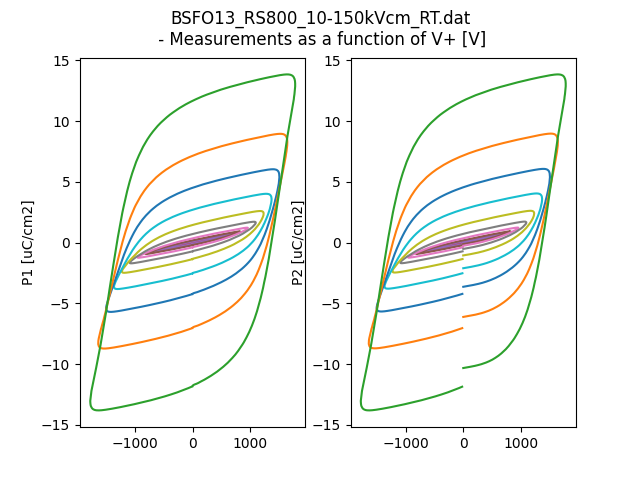

In [20]:
for x_axis in plots:
    print(wantedFiles[0])
    plotData(loadedTables[wantedFiles[0]], x_axis, plots[x_axis], fileName=wantedFiles[0])

Let's repeat the same procedure for the second element of the list (in this case `../data\\BSFO13_RS820_10-150kVcm_RT.dat`)

For this one we will also demonstrate one new feature.

C:/Users/Uporabnik/Documents/Git projekti/ajzakt/data/BSFO13_RS800_12h_10-150kVcm_RT.dat
V+ [V] P1 [uC/cm2]
V+ [V] P2 [uC/cm2]


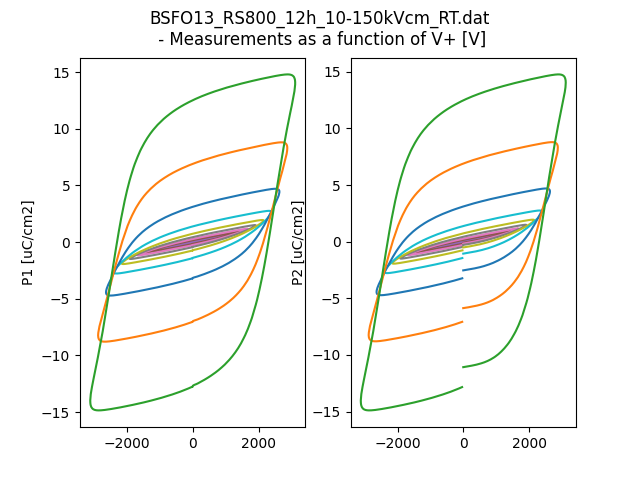

In [18]:
for x_axis in plots:
    print(wantedFiles[1])
    plotData(loadedTables[wantedFiles[1]], x_axis, plots[x_axis], fileName=wantedFiles[1])

### 4. Printing only some contours

What if some of these contours are not interesting to us and we wish not to plot them with the interesting ones?

Run the cell below to get a list of contours and a checkbox to exclude irrelevant ones.

In [15]:
from helperFunctions import newestSplit, splitMessage, checkedBoxes

def changed(b):
    i = splitMessage.index(b["owner"].description)
    checkedBoxes[i] = b["owner"].value
    print("\n========\n")
    print("{}: switched to {}".format(b["owner"].description, b["owner"].value))

from IPython.display import display
from ipywidgets import Checkbox

#print(contours)
checkboxes = []
checkedBoxes = []
print(checkedBoxes)

for msg in splitMessage:
    checkboxes.append(Checkbox(True, description=str(msg)))
    checkedBoxes.append(True)

for chkBx in checkboxes:
    display(chkBx)
    chkBx.observe(changed, names=['value'])
    
#TODO make a function that import/exports bool values to and from checkboxes

[]


Checkbox(value=True, description='Contour 0 - Points ( 0 -> 401 ]')

Checkbox(value=True, description='Contour 1 - Points ( 401 -> 802 ]')

Checkbox(value=True, description='Contour 2 - Points ( 802 -> 1203 ]')

Checkbox(value=True, description='Contour 3 - Points ( 1203 -> 1604 ]')

Checkbox(value=True, description='Contour 4 - Points ( 1604 -> 2005 ]')

Checkbox(value=True, description='Contour 5 - Points ( 2005 -> 2406 ]')

Checkbox(value=True, description='Contour 6 - Points ( 2406 -> 2807 ]')

Checkbox(value=True, description='Contour 7 - Points ( 2807 -> 3208 ]')

Checkbox(value=True, description='Contour 8 - Points ( 3208 -> 3609 ]')

Checkbox(value=True, description='Contour 9 - Points ( 3609 -> 4010 ]')

Checkbox(value=True, description='Contour 10 - Points ( 4010 -> 4411 ]')

Checkbox(value=True, description='Contour 11 - Points ( 4411 -> 4812 ]')

Checkbox(value=True, description='Contour 12 - Points ( 4812 -> 5213 ]')



Contour 10 - Points ( 4010 -> 4411 ]: switched to False


Contour 9 - Points ( 3609 -> 4010 ]: switched to False


Contour 8 - Points ( 3208 -> 3609 ]: switched to False


Contour 7 - Points ( 2807 -> 3208 ]: switched to False


Contour 6 - Points ( 2406 -> 2807 ]: switched to False


Contour 5 - Points ( 2005 -> 2406 ]: switched to False


Contour 4 - Points ( 1604 -> 2005 ]: switched to False


Contour 3 - Points ( 1203 -> 1604 ]: switched to False


Contour 2 - Points ( 802 -> 1203 ]: switched to False


Contour 1 - Points ( 401 -> 802 ]: switched to False


Contour 11 - Points ( 4411 -> 4812 ]: switched to False


In [ ]:
checkedBoxes

V+ [V] D1 [nm]
V+ [V] D2 [nm]


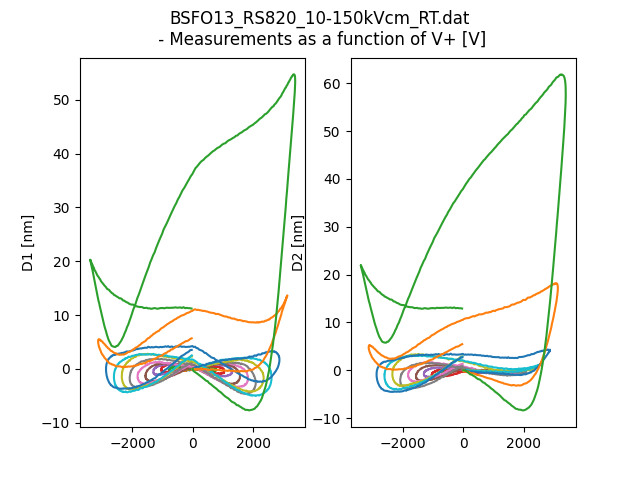

In [23]:
# Alternative plotting from the third file
plotData(loadedTables[wantedFiles[2]], x_axis, ["D1 [nm]","D2 [nm]"], fileName=wantedFiles[2])

### 5. Combine plot data from two different files
You can also combine data from all of the files together on the same plot using the `plotMultiple()` function from my `helperFunctions.py` script.

V+ [V] P1 [uC/cm2]
V+ [V] P2 [uC/cm2]
V+ [V] P1 [uC/cm2]
V+ [V] P2 [uC/cm2]
V+ [V] P1 [uC/cm2]
V+ [V] P2 [uC/cm2]


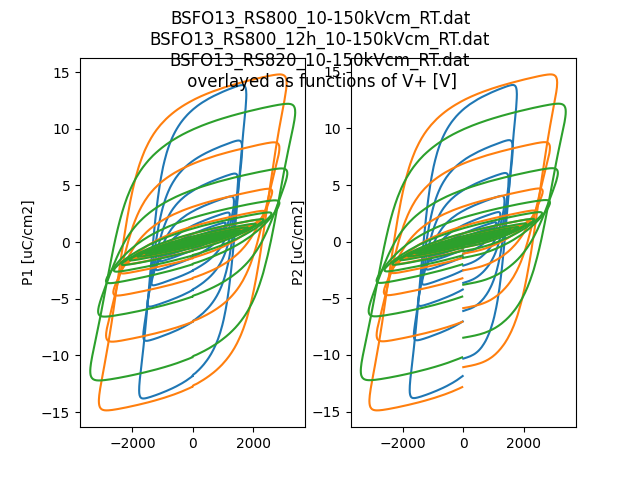

In [24]:
plotMultiple(loadedTables, "V+ [V]", ["P1 [uC/cm2]", "P2 [uC/cm2]"])